In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('owid-energy-data.csv')
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,Afghanistan,1900,AFG,4832414.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,AFG,4879685.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,AFG,4935122.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1903,AFG,4998861.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1904,AFG,5063419.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21890 entries, 0 to 21889
Columns: 129 entries, country to wind_share_energy
dtypes: float64(126), int64(1), object(2)
memory usage: 21.5+ MB


## Data Cleaning - filtering of columns

We have decided to take the general metric of fossil fuels and renewables rather than coal, gas, oil, nuclear etc.

In addition, we look at relative data for fossil fuel / renewables usage rather than absolute data to make accurate comparisons.

Other data we have included are greenhouse gas emissions, country, iso_code, population.

In [5]:
cols = ['country', 'iso_code', 'year', 'population', 'gdp', 'greenhouse_gas_emissions', 'fossil_fuel_consumption', 'fossil_cons_change_pct', 'fossil_share_energy', 'fossil_share_elec',
        'fossil_elec_per_capita', 'fossil_energy_per_capita', 'renewables_consumption', 'renewables_cons_change_pct', 'renewables_share_energy', 'renewables_share_elec', 
        'renewables_elec_per_capita', 'renewables_energy_per_capita']

In [6]:
df1 = df.loc[:, cols]
df1.head()

,country,iso_code,year,population,gdp,greenhouse_gas_emissions,fossil_fuel_consumption,fossil_cons_change_pct,fossil_share_energy,fossil_share_elec,fossil_elec_per_capita,fossil_energy_per_capita,renewables_consumption,renewables_cons_change_pct,renewables_share_energy,renewables_share_elec,renewables_elec_per_capita,renewables_energy_per_capita
0,Afghanistan,AFG,1900,4832414.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1901,4879685.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1902,4935122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1903,4998861.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1904,5063419.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning - create continent data for comparison

We compare continents for energy usage rather than countries as we are concerned with the overall energy usage.

In addition, countries' economic states vary a lot and time-series forecasting may not work for these countries realistically.

In [7]:
continents = ['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']
continent_data = df1[df1['country'].isin(continents)]
continent_data.head()

,country,iso_code,year,population,gdp,greenhouse_gas_emissions,fossil_fuel_consumption,fossil_cons_change_pct,fossil_share_energy,fossil_share_elec,fossil_elec_per_capita,fossil_energy_per_capita,renewables_consumption,renewables_cons_change_pct,renewables_share_energy,renewables_share_elec,renewables_elec_per_capita,renewables_energy_per_capita
122,Africa,NaN,1900,138827369.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Africa,NaN,1901,139097937.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,Africa,NaN,1902,139567767.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,Africa,NaN,1903,140074606.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,Africa,NaN,1904,140595545.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
continent_metrics = ['population', 'greenhouse_gas_emissions', 'fossil_fuel_consumption', 
                     'renewables_consumption', 'fossil_cons_change_pct', 'renewables_cons_change_pct',
                     'fossil_share_energy', 'renewables_share_energy']

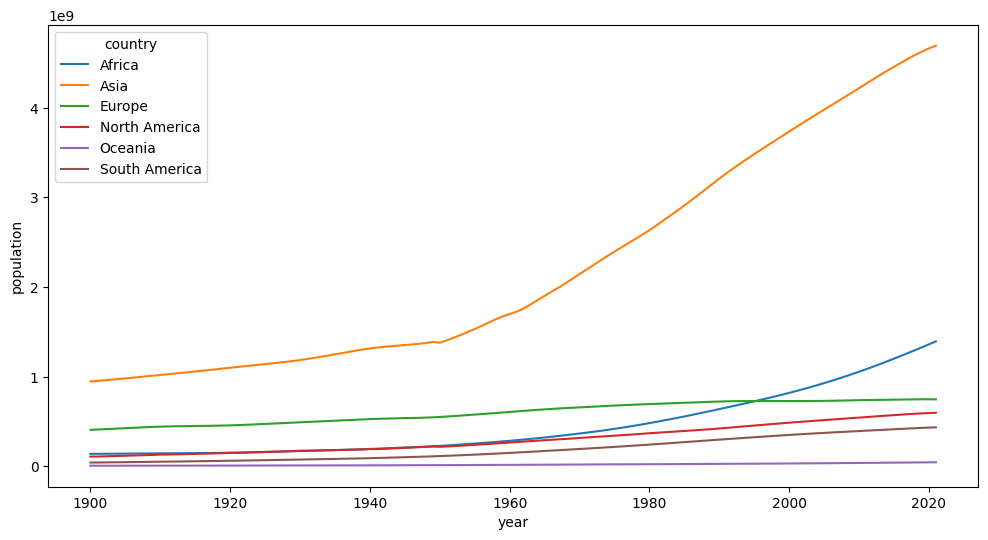

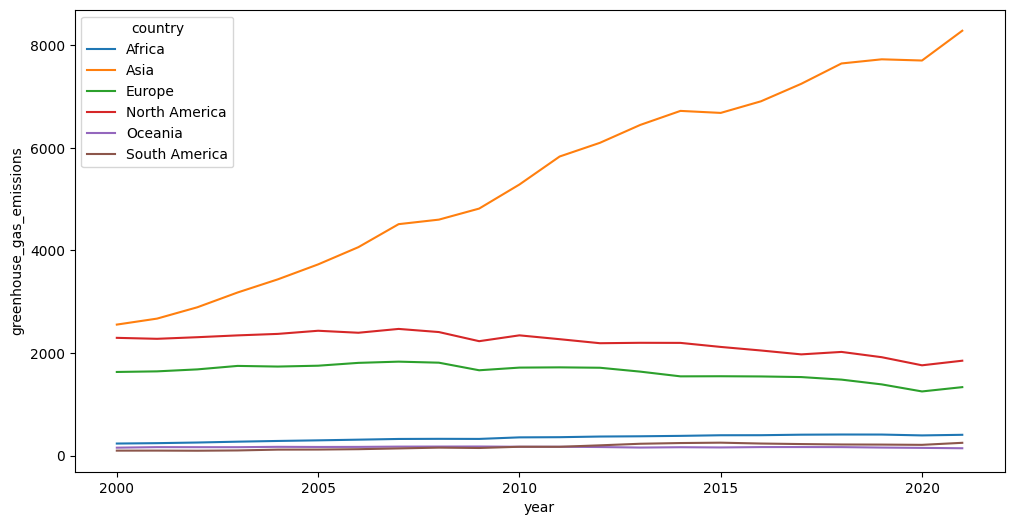

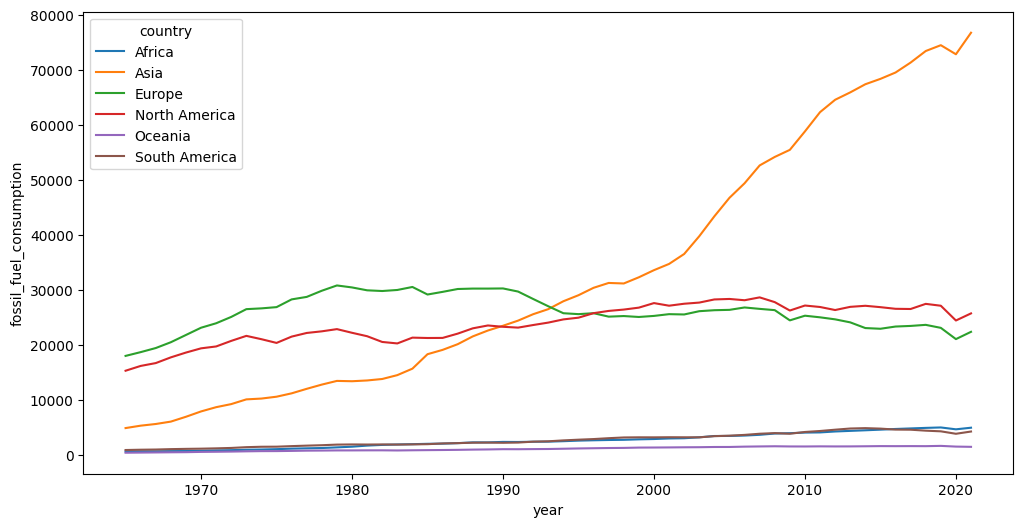

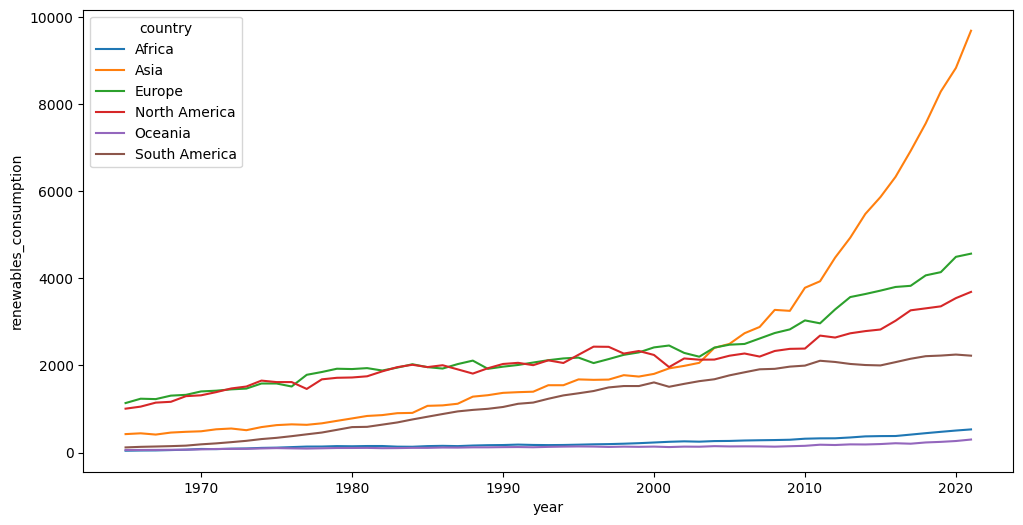

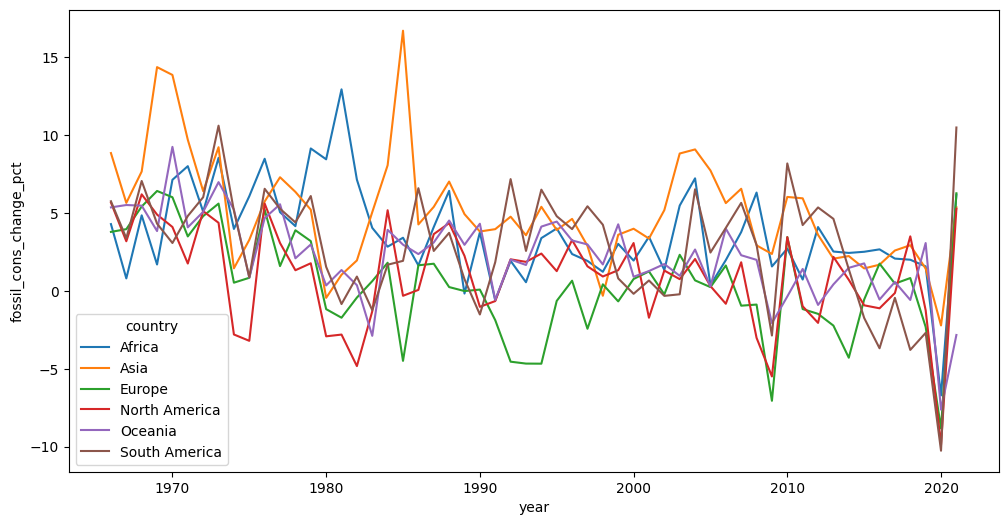

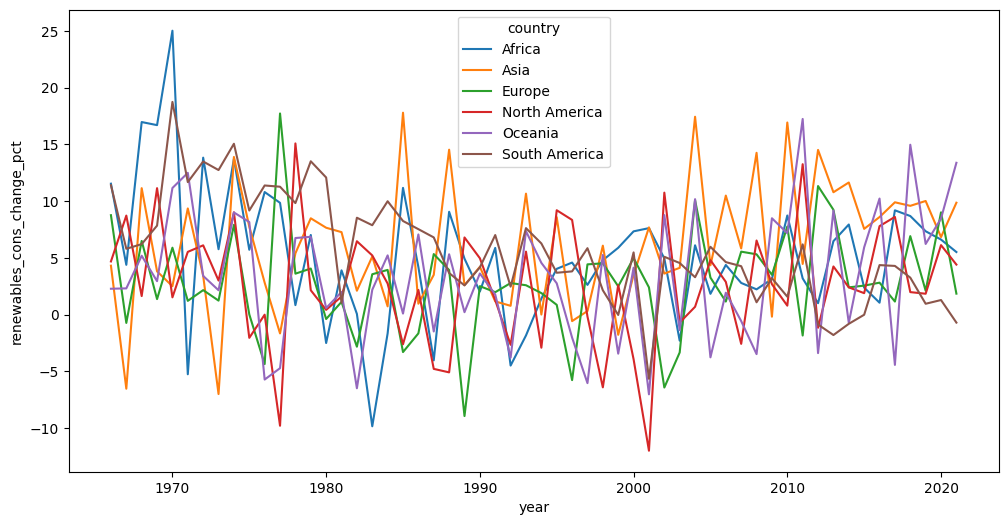

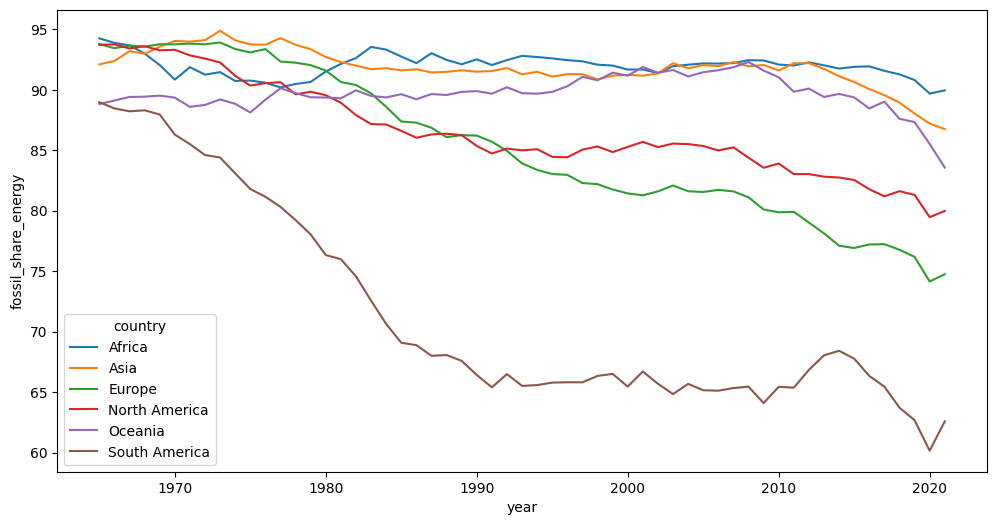

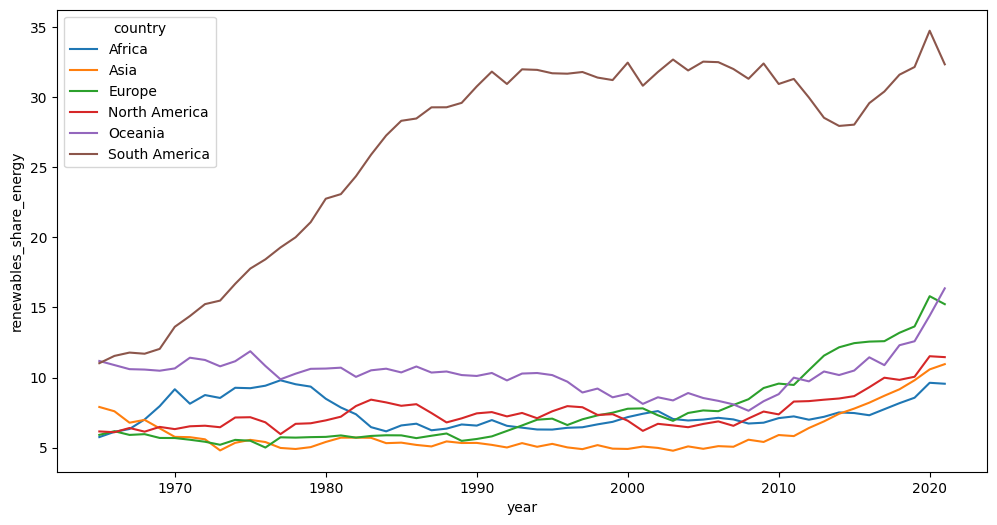

In [9]:
for metric in continent_metrics:
    figure = plt.figure(figsize=(12,6))
    sb.lineplot(data=continent_data, x = 'year', y = metric, hue = 'country')

## Data Cleaning - choropleths for countries (greenhouse gas emissions, fossil fuel consumption and renewables consumption)

In [10]:
# import plotly
import plotly.express as px


In [11]:
# countries.csv is extracted from online where it contains ISO 3166-1 alpha-3 codes of 193 recognised countries
iso_codes = pd.read_csv('countries.csv')
alpha3 = iso_codes['alpha3'].apply(str.upper).unique()
print("Recognised countries: ", len(alpha3))

iso_countries = df1[df1['iso_code'].isin(alpha3)]['iso_code'].unique()
print("Countries in dataframe: ",len(iso_countries))

Recognised countries:  193
Countries in dataframe:  187


In [12]:
# make alpha3 into a dataframe (from a numpy array) to check for missing countries
df_alpha3 = pd.DataFrame(alpha3)
mis_countries = df_alpha3[~df_alpha3.isin(iso_countries)].dropna()
mis_countries

,0
3,AND
99,LIE
108,MHL
114,MCO
132,PLW
148,SMR


The officially recognised countries (based on ISO 3166-1 alpha3 codes) not included are: **Andorra, Liechtenstein, Marshall Islands, Monaco, Palau and San Marino**

We don't need to include their data as they are relatively small countries

In [13]:
# initialise countries dataframe for the 187 countries identified
country_data = df1[df1['iso_code'].isin(iso_countries)].copy()

# exclude year 2022 as visual inspection on excel file shows many missing countries
country_data = country_data[country_data['year'] < 2022]
country_data

,country,iso_code,year,population,gdp,greenhouse_gas_emissions,fossil_fuel_consumption,fossil_cons_change_pct,fossil_share_energy,fossil_share_elec,fossil_elec_per_capita,fossil_energy_per_capita,renewables_consumption,renewables_cons_change_pct,renewables_share_energy,renewables_share_elec,renewables_elec_per_capita,renewables_energy_per_capita
0,Afghanistan,AFG,1900,4832414.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1901,4879685.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1902,4935122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1903,4998861.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1904,5063419.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21885,Zimbabwe,ZWE,2017,14751101.0,2.194784e+10,2.67,NaN,NaN,NaN,41.497,206.764,NaN,NaN,NaN,NaN,58.503,291.504,NaN
21886,Zimbabwe,ZWE,2018,15052191.0,2.271535e+10,3.27,NaN,NaN,NaN,40.588,247.804,NaN,NaN,NaN,NaN,59.412,362.738,NaN
21887,Zimbabwe,ZWE,2019,15354606.0,NaN,3.19,NaN,NaN,NaN,44.417,238.365,NaN,NaN,NaN,NaN,55.583,298.282,NaN
21888,Zimbabwe,ZWE,2020,15669663.0,NaN,2.96,NaN,NaN,NaN,44.868,217.618,NaN,NaN,NaN,NaN,55.132,267.396,NaN


In [14]:
# determine the metrics we want to use for choropleths
country_metrics = ['population', 'greenhouse_gas_emissions', 'fossil_fuel_consumption', 'renewables_consumption', "fossil_elec_per_capita", 'renewables_elec_per_capita']

# create a dictionary to store the upper limits for each column
upper_limits = {}

# Loop over each column and calculate the truncated mean and standard deviation
for column in country_metrics:
    country_data1 = country_data.dropna()
    threshold = np.percentile(country_data1[column], 65)
    truncated_data = country_data1[country_data1[column] <= threshold][column]
    truncated_mean = np.mean(truncated_data)
    truncated_std = np.std(truncated_data)

    # Set the upper limit for the color scale to be 3 standard deviations above the truncated mean
    upper_limits[column] = truncated_mean + 3 * truncated_std

upper_limits

{'population': 47266285.23367334,
 'greenhouse_gas_emissions': 54.165694214326294,
 'fossil_fuel_consumption': 879.8421086366272,
 'renewables_consumption': 83.06933826830591,
 'fossil_elec_per_capita': 4267.904310434094,
 'renewables_elec_per_capita': 1233.224916352759}

In [15]:
# start from 1985
fig = px.choropleth(data_frame=country_data,
                    locations="iso_code",
                    color='population',
                    animation_frame='year',
                    color_continuous_scale='Reds',
                    center={"lat": 0, "lon": 0},
                    width = 1200,
                    height = 800,
                    range_color=(0,upper_limits['population']))
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 30
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 5
fig.show()

In [16]:
# start from year 2000
fig = px.choropleth(data_frame=country_data,
                    locations="iso_code",
                    color='greenhouse_gas_emissions',
                    animation_frame='year',
                    color_continuous_scale='Reds',
                    center={"lat": 0, "lon": 0},
                    width = 1200,
                    height = 800,
                    range_color=(0,upper_limits['greenhouse_gas_emissions']))
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 150
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 10
fig.show()

In [17]:
# start from year 2000
fig = px.choropleth(data_frame=country_data,
                    locations="iso_code",
                    color='fossil_elec_per_capita',
                    animation_frame='year',
                    color_continuous_scale='Reds',
                    center={"lat": 0, "lon": 0},
                    width = 1200,
                    height = 800,
                    range_color=(0,upper_limits['fossil_elec_per_capita']))
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 100
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 10
fig.show()

## Machine Learning - Auto Regressive Integrated Moving Average

Broken down into 3 parameters with non-negative integer values:

1. Auto Regressive (p)

    - time series is linearly regressed on its own past values

    - p is the number of past values included in the AR model

2. Integrated (d)

    - if not stationary, time series has to be differenced to become stationary (i.e. compute the difference between consecutive observations)

    - d is the number of times the time series is differenced
    
3. Moving Average (q)

    - time series is regressed based on the past forecast errors
    
    - q is the number of past forecast errors in the MA model

https://www.youtube.com/watch?v=-aCF0_wfVwY

## Exploring the data

Reduce time variance by taking logarithm - but don't forget to transform back when making real predictions

Split into training and test set - training data can be before 2000, test data can be 2000 to 2019 (Removed 2020 due to COVID-19 pandemic affecting energy consumption - black swan event)

### Check for stationarity of time series

Tell by looking at the plots - energy trends is decreasing for renewables

**ACF** - correlation of time series with its lags (y(t) and y(t-k) for k = 1, 2..)

Problem is y(t) is related to y(t-1) which is related to y(t-2). So how do we measure if there is new info in y(t-2) to predict y(t) beside their relationship with y(t-1)?

Hence, we use **PACF** - partial correlation of time series with its lags AFTER removing the lower-order-lags between them

We can use statistical tests like **ADF** which stands for Augmented Dickey Fuller.

ADF tests for the null hypothesis that there is a unit root (i.e. non-stationary). Stationarity would mean a small p-value (<0.05).

### Transform time series to be stationary - Differencing

Helps to stabilise the mean by removing changes in levels of the series (current observation - previous observation)

Use .diff().dropna() on the training dataset - dropna() is used to remove first observation since it has nothing to subtract.

Replot ACF, PACF and ADF to see if it can be considered as stationary - usually do not go beyond 2nd order differencing.

Determine the differencing and continue to find p and q with the differenced training data.

### Determine parameters p and q

1. If PACF plot has a significant spike at lag p, but not beyond - ACF plot decays more gradually -> q can be considered to be 0

2. If ACF plot has a significant spike at lag q, but not beyond - PACF plot decays more gradually -> p can be considered to be 0

Do not have mixed variations of both - i.e. at least one should be zero

### Fit the ARIMA model

After fitting, use residuals (model_fit.resid[1:]) to check that it should be random like white noise. Density must be normally-distributed.

ACF and PACF should have no significant spikes as well.

### Other suggestions

Time series cross validation to select the best model

## Europe's ARIMA model

<Axes: xlabel='year'>

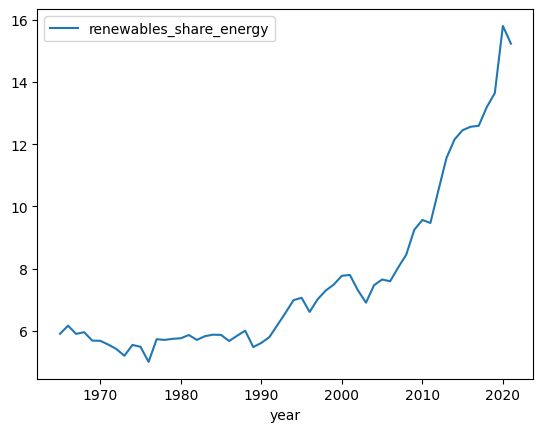

In [18]:
# Start with one continent data first - Europe's renewable share of energy usage
eu_renew = continent_data[continent_data['country'] == 'Europe'][['year', 'renewables_share_energy']].dropna().reset_index().drop(columns='index')
eu_renew.plot(x = 'year', y = 'renewables_share_energy')

In [392]:
# split into training and test sets - Training: 1965-2010, Test: 2010-2020
# rationale is trend changes towards the more recent years which we want to capture in our model
eu_renew_train = eu_renew[eu_renew['year'] < 2015].copy()
eu_renew_test = eu_renew[~(eu_renew['year'] < 2015)].copy()

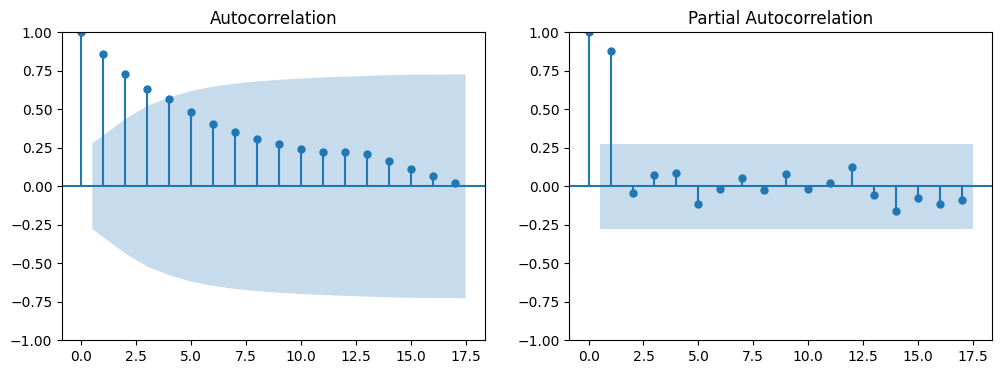

In [494]:
# plot ACF and PACF plot on un-differenced data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1,2, figsize=(12,4))
acf_original = plot_acf(eu_renew_train['renewables_share_energy'], ax=ax[0])
pacf_original = plot_pacf(eu_renew_train['renewables_share_energy'], ax=ax[1])

In [495]:
# check ADF test
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(eu_renew_train['renewables_share_energy'])
print(f'p-value: {adf_test[1]}')

p-value: 1.0


<Axes: >

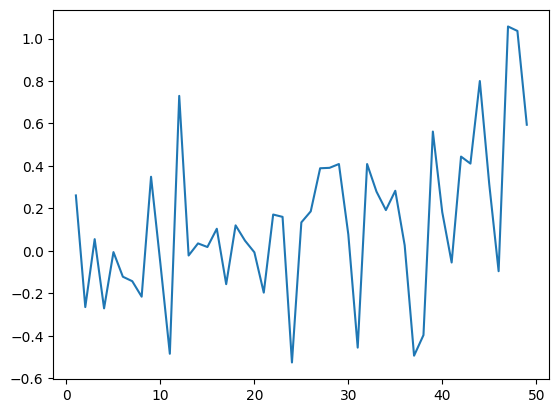

In [496]:
eu_renew_train_diff = eu_renew_train['renewables_share_energy'].diff().dropna()
eu_renew_train_diff.plot()

c:\Users\bklec\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



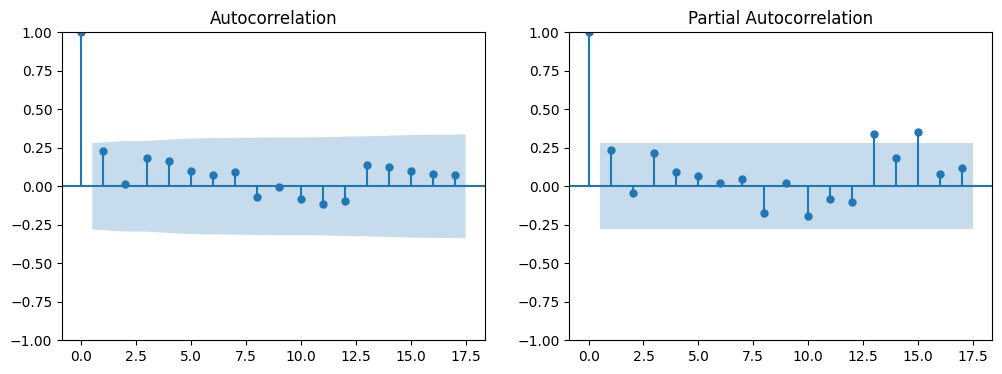

In [498]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
acf_diff = plot_acf(eu_renew_train_diff, ax=ax[0])
pacf_diff = plot_pacf(eu_renew_train_diff, ax=ax[1])

In [499]:
adf_test = adfuller(eu_renew_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 7.22487362504044e-06


p-value rejects null hypothesis for ADF test and PACF & ACF plots show a sharp drop after lag 1.

We fit the ARIMA model of (1,1,1) into our training dataset.

In [509]:
# we don't use second order as it will cause the data to be less stationary
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(eu_renew_train['renewables_share_energy'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                                  SARIMAX Results                                  
Dep. Variable:     renewables_share_energy   No. Observations:                   50
Model:                      ARIMA(1, 1, 1)   Log Likelihood                 -17.908
Date:                     Thu, 30 Mar 2023   AIC                             41.815
Time:                             19:08:46   BIC                             47.491
Sample:                                  0   HQIC                            43.969
                                      - 50                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9715      0.118      8.231      0.000       0.740       1.203
ma.L1         -0.8059      0.207     -3.898      0.000      -1.211      -0.401
sigma2      

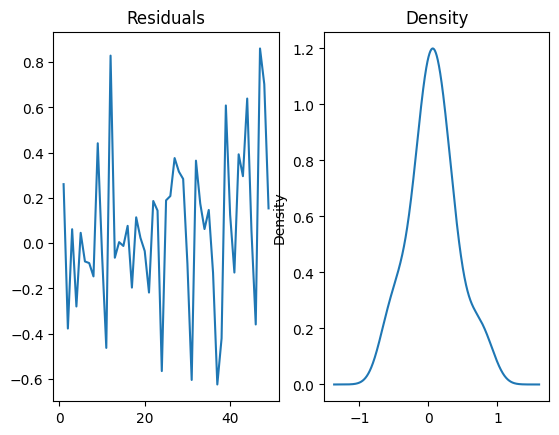

In [510]:
# now we make a time series prediction to observe the accuracy of the model
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

c:\Users\bklec\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



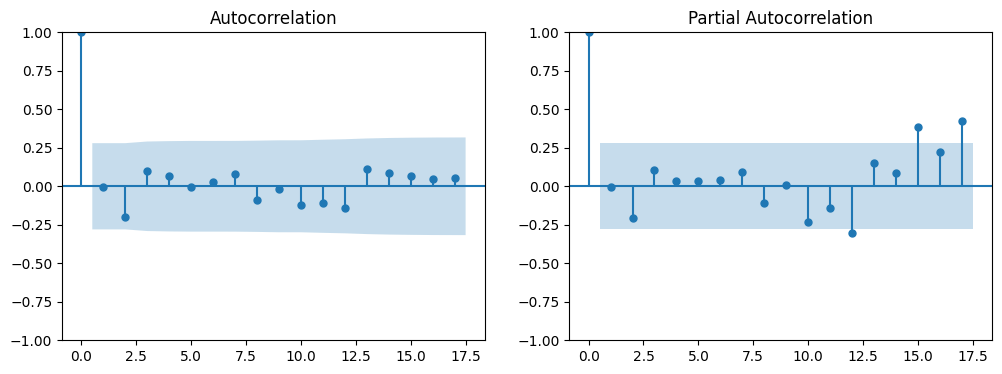

In [511]:
# plot acf and pacf of residuals to check
fig, ax = plt.subplots(1,2, figsize=(12,4))
acf_res = plot_acf(residuals, ax=ax[0])
pacf_res = plot_pacf(residuals, ax=ax[1])

<Axes: >

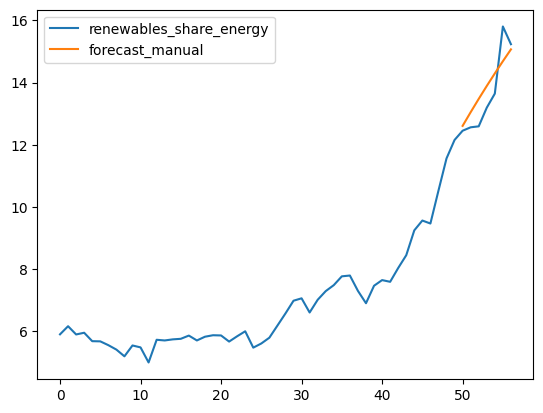

In [512]:
forecast_test = model_fit.forecast(len(eu_renew_test['renewables_share_energy']))
eu_renew['forecast_manual'] = [None]*len(eu_renew_train) + list(forecast_test)
eu_renew[['renewables_share_energy', 'forecast_manual']].plot()

In [513]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(eu_renew_test['renewables_share_energy'], forecast_test)
mape = mean_absolute_percentage_error(eu_renew_test['renewables_share_energy'], forecast_test)
rmse = np.sqrt(mean_squared_error(eu_renew_test['renewables_share_energy'], forecast_test))

print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')

mae - auto: 0.5937549818777865
mape - auto: 0.04334545062295447
rmse - auto: 0.6787789842902036


In [514]:
import pmdarima as pm
auto_arima = pm.auto_arima(eu_renew_train['renewables_share_energy'], stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(2, 2, 1), scoring_args={}, suppress_warnings=True)

In [515]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   50
Model:               SARIMAX(2, 2, 1)   Log Likelihood                 -15.504
Date:                Thu, 30 Mar 2023   AIC                             41.007
Time:                        19:08:55   BIC                             50.363
Sample:                             0   HQIC                            44.543
                                 - 50                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0199      0.014      1.446      0.148      -0.007       0.047
ar.L1         -0.0938      0.184     -0.509      0.611      -0.455       0.268
ar.L2         -0.2788      0.201     -1.388      0.165      -0.672       0.115
ma.L1         -0.7485      0.168     -4.448      0.000      -1.078      -0.419
sigma2         0.1085      0.024      4.596      0.000       0.062       0.155
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.05
Prob(Q):                              0.94   Prob(JB):                         0.98
Heteroskedasticity (H):               1.71   Skew:                             0.07
Prob(H) (two-sided):                  0.29   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

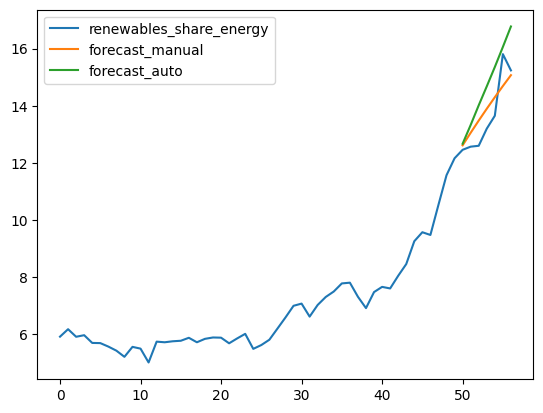

In [516]:
forecast_test_auto = auto_arima.predict(n_periods=len(eu_renew_test))
eu_renew['forecast_auto'] = [None]*len(eu_renew_train) + list(forecast_test_auto)

eu_renew[['renewables_share_energy', 'forecast_manual', 'forecast_auto']].plot()

### For Europe's renewables_share_energy, we use ARIMA (1,1,1) for forecassting (manually determined)

Now, we repeat the same steps for the other continents

## Asia's ARIMA model

<Axes: xlabel='year'>

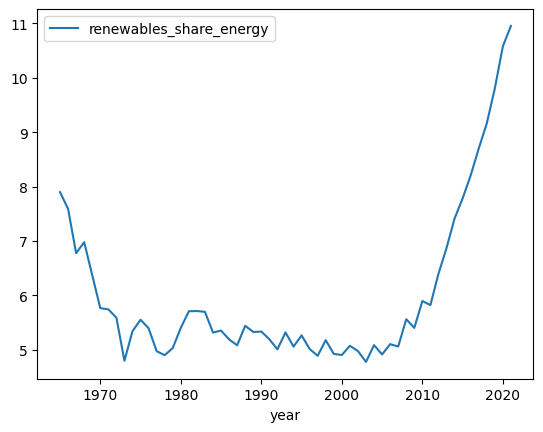

In [656]:
# initialise renewables for asia
asia_renew = continent_data[continent_data['country'] == 'Asia'][['year', 'renewables_share_energy']].dropna().reset_index().drop(columns='index')
asia_renew.plot(x = 'year', y = 'renewables_share_energy')

In [670]:
# determine train-test split and acf/pacf
asia_renew_train = asia_renew[asia_renew['year'] < 2016].copy()
asia_renew_test = asia_renew[~(asia_renew['year'] < 2016)].copy()

c:\Users\bklec\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



p-value: 0.001871637762597104


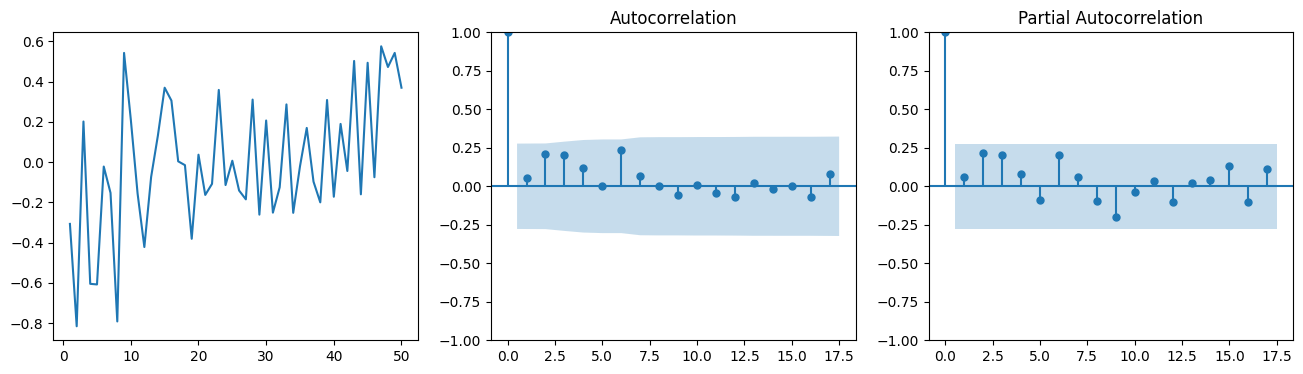

In [671]:
# adf test insufficient to reject null hypothesis - do first order differencing
fig, ax = plt.subplots(1,3, figsize=(16,4))
asia_renew_train_diff = asia_renew_train['renewables_share_energy'].diff().dropna()
asia_renew_train_diff.plot(ax=ax[0])
acf_diff = plot_acf(asia_renew_train_diff, ax=ax[1])
pacf_diff = plot_pacf(asia_renew_train_diff, ax=ax[2])

adf_test_diff = adfuller(asia_renew_train_diff)
print(f'p-value: {adf_test_diff[1]}')

In [672]:
# fit the arima model based on parameters above and look at AIC/BIC - this combination of (p, d, q) gives the lowest AIC/BIC score
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(asia_renew_train['renewables_share_energy'], order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())

                                  SARIMAX Results                                  
Dep. Variable:     renewables_share_energy   No. Observations:                   51
Model:                      ARIMA(2, 1, 2)   Log Likelihood                 -10.253
Date:                     Thu, 30 Mar 2023   AIC                             30.506
Time:                             19:29:20   BIC                             40.066
Sample:                                  0   HQIC                            34.147
                                      - 51                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5862      0.179      8.849      0.000       1.235       1.938
ar.L2         -0.6350      0.187     -3.400      0.001      -1.001      -0.269
ma.L1       

c:\Users\bklec\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



c:\Users\bklec\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



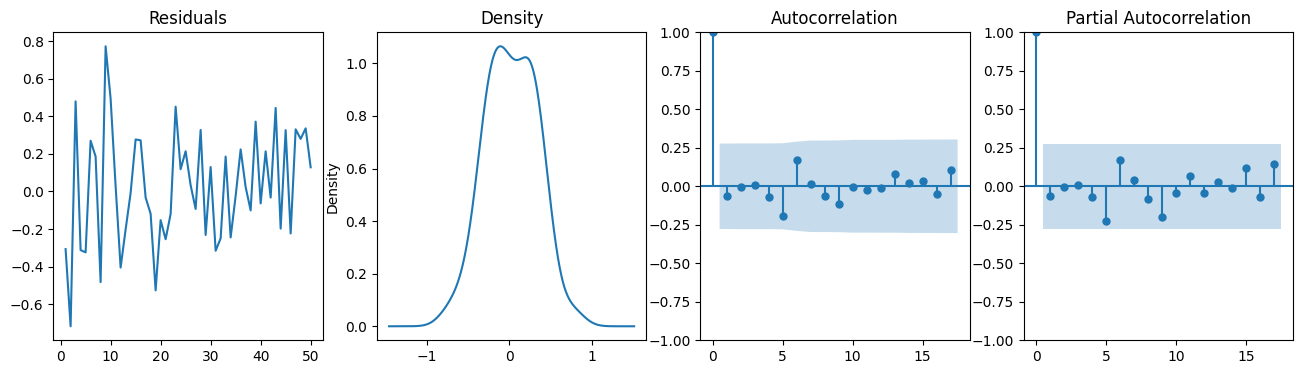

In [673]:
# plot acf and pacf of residuals to check - make sure they are white noise after the first lag
fig, ax = plt.subplots(1,4, figsize=(16,4))

residuals = model_fit.resid[1:]
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
acf_res = plot_acf(residuals, ax=ax[2])
pacf_res = plot_pacf(residuals, ax=ax[3])

mae - auto: 0.427330874945949
mape - auto: 0.04209957937914909
rmse - auto: 0.5171144574507314


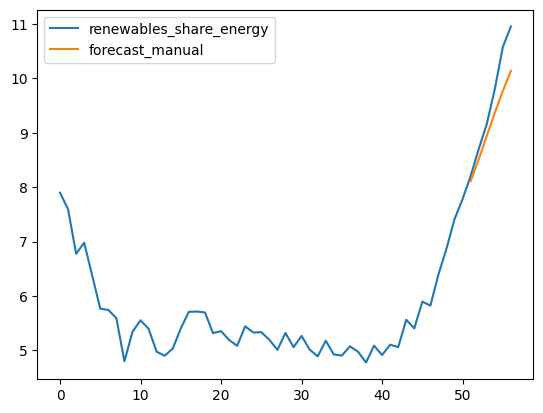

In [674]:
# look at the manually determined data
forecast_test = model_fit.forecast(len(asia_renew_test['renewables_share_energy']))
asia_renew['forecast_manual'] = [None]*len(asia_renew_train) + list(forecast_test)

asia_renew[['renewables_share_energy', 'forecast_manual']].plot()

mae = mean_absolute_error(asia_renew_test['renewables_share_energy'], forecast_test)
mape = mean_absolute_percentage_error(asia_renew_test['renewables_share_energy'], forecast_test)
rmse = np.sqrt(mean_squared_error(asia_renew_test['renewables_share_energy'], forecast_test))

print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   51
Model:               SARIMAX(1, 0, 3)   Log Likelihood                 -17.308
Date:                Thu, 30 Mar 2023   AIC                             44.617
Time:                        19:29:25   BIC                             54.276
Sample:                             0   HQIC                            48.308
                                 - 51                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9984      0.012     82.480      0.000       0.975       1.022
ma.L1          0.0141      0.142      0.099      0.921      -0.263       0.292
ma.L2          0.2487      0.138      1.800      0.0

<Axes: >

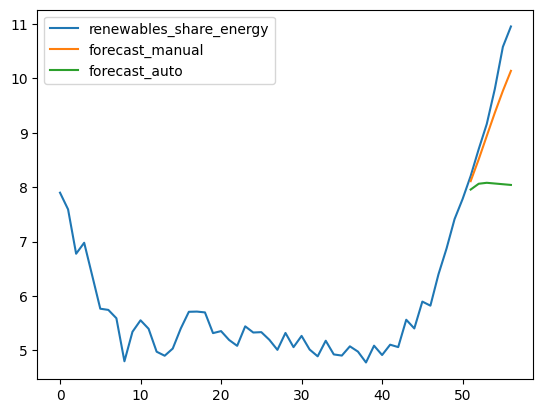

In [675]:
auto_arima = pm.auto_arima(asia_renew_train['renewables_share_energy'], stepwise=False, seasonal=False)
print(auto_arima.summary())

forecast_test_auto = auto_arima.predict(n_periods=len(asia_renew_test))
asia_renew['forecast_auto'] = [None]*len(asia_renew_train) + list(forecast_test_auto)

asia_renew[['renewables_share_energy', 'forecast_manual', 'forecast_auto']].plot()

### Hence, for Asia's renewables_share_energy, we use an ARIMA model of (2,1,2) for forecasting (manually determined)

## Africa's ARIMA model

<Axes: xlabel='year'>

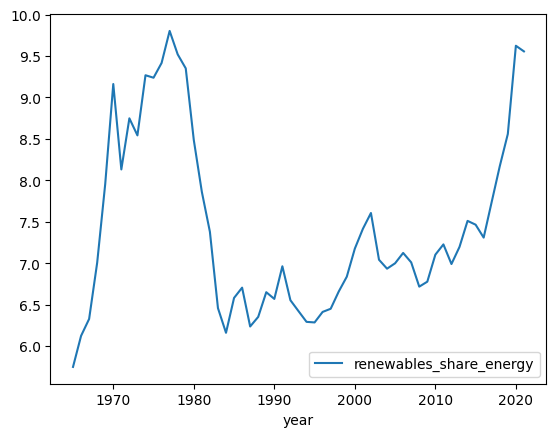

In [535]:
africa_renew = continent_data[continent_data['country'] == 'Africa'][['year', 'renewables_share_energy']].dropna().reset_index().drop(columns='index')
africa_renew.plot(x = 'year', y = 'renewables_share_energy')

c:\Users\bklec\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



p-value: 0.21797308650456426


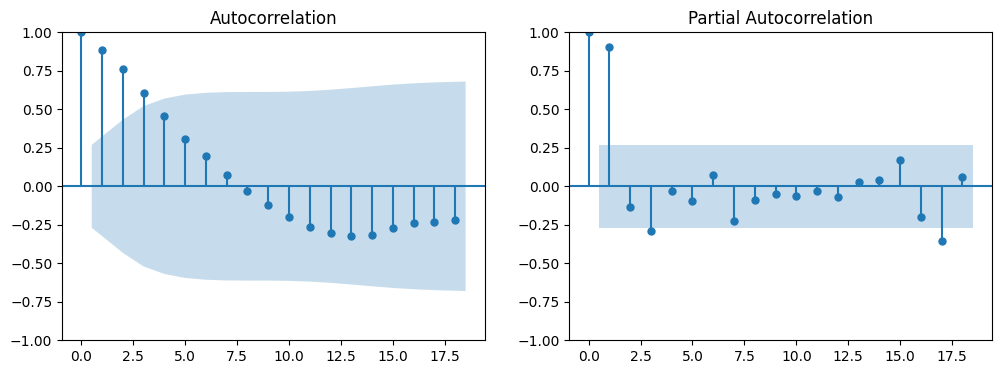

In [749]:
africa_renew_train = africa_renew[africa_renew['year'] < 2018].copy()
africa_renew_test = africa_renew[~(africa_renew['year'] < 2018)].copy()

fig, ax = plt.subplots(1,2, figsize=(12,4))
acf_original = plot_acf(africa_renew_train['renewables_share_energy'], ax=ax[0])
pacf_original = plot_pacf(africa_renew_train['renewables_share_energy'], ax=ax[1])

adf_test = adfuller(africa_renew_train['renewables_share_energy'])
print(f'p-value: {adf_test[1]}')

c:\Users\bklec\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



p-value: 1.264765054707158e-07


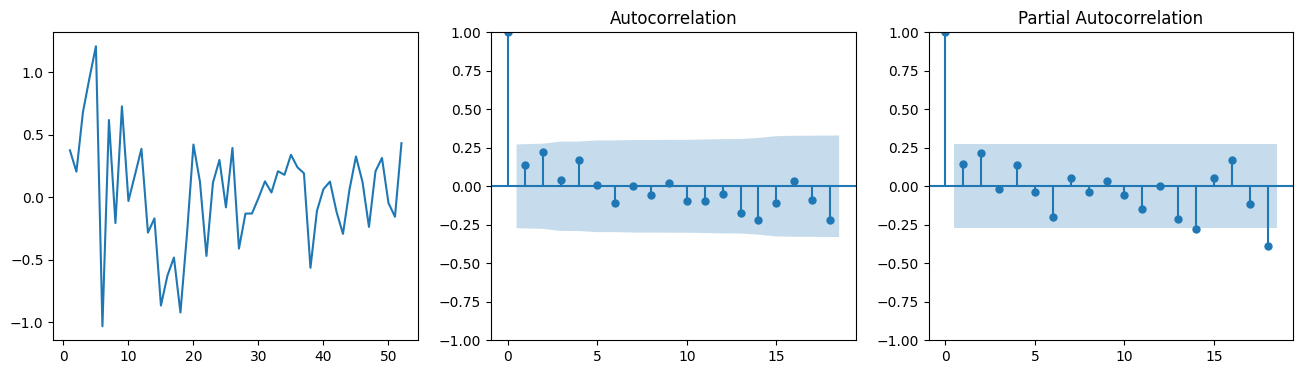

In [750]:
fig, ax = plt.subplots(1,3, figsize=(16,4))

# adf test insufficient to reject null hypothesis - do first order differencing and plot the data, ACF and PACF
africa_renew_train_diff = africa_renew_train['renewables_share_energy'].diff().dropna()
africa_renew_train_diff.plot(ax=ax[0])

acf_diff = plot_acf(africa_renew_train_diff, ax=ax[1])
pacf_diff = plot_pacf(africa_renew_train_diff, ax=ax[2])

adf_test_diff = adfuller(africa_renew_train_diff)
print(f'p-value: {adf_test_diff[1]}')

In [751]:
# fit the arima model based on parameters above and look at AIC/BIC - this combination of (p, d, q) gives the lowest AIC/BIC score
model = ARIMA(africa_renew_train['renewables_share_energy'], order=(0,2,1))
model_fit = model.fit()
print(model_fit.summary())

                                  SARIMAX Results                                  
Dep. Variable:     renewables_share_energy   No. Observations:                   53
Model:                      ARIMA(0, 2, 1)   Log Likelihood                 -30.757
Date:                     Thu, 30 Mar 2023   AIC                             65.513
Time:                             19:42:07   BIC                             69.377
Sample:                                  0   HQIC                            66.990
                                      - 53                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7835      0.082     -9.531      0.000      -0.945      -0.622
sigma2         0.1920      0.027      7.173      0.000       0.140       0.244
Ljung-Box (L

<Axes: >

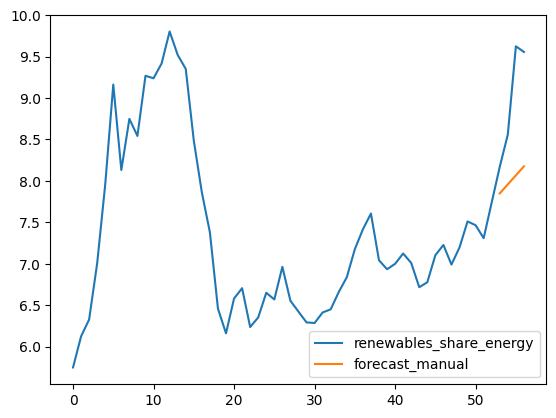

In [752]:
# look at the manually determined data
forecast_test = model_fit.forecast(len(africa_renew_test['renewables_share_energy']))
africa_renew['forecast_manual'] = [None]*len(africa_renew_train) + list(forecast_test)

africa_renew[['renewables_share_energy', 'forecast_manual']].plot()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   53
Model:               SARIMAX(1, 0, 2)   Log Likelihood                 -32.224
Date:                Thu, 30 Mar 2023   AIC                             72.447
Time:                        19:42:15   BIC                             80.328
Sample:                             0   HQIC                            75.478
                                 - 53                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9969      0.010    101.755      0.000       0.978       1.016
ma.L1          0.1276      0.112      1.142      0.254      -0.091       0.347
ma.L2          0.1722      0.129      1.336      0.1

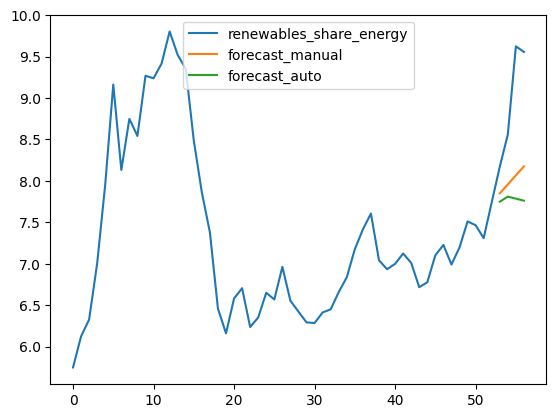

In [753]:
# compare auto and manually forecasted models
auto_arima = pm.auto_arima(africa_renew_train['renewables_share_energy'], stepwise=False, seasonal=False)
print(auto_arima.summary())

forecast_test_auto = auto_arima.predict(n_periods=len(africa_renew_test))
africa_renew['forecast_auto'] = [None]*len(africa_renew_train) + list(forecast_test_auto)

africa_renew[['renewables_share_energy', 'forecast_manual', 'forecast_auto']].plot()

mae = mean_absolute_error(africa_renew_test['renewables_share_energy'], forecast_test)
mape = mean_absolute_percentage_error(africa_renew_test['renewables_share_energy'], forecast_test)
rmse = np.sqrt(mean_squared_error(africa_renew_test['renewables_share_energy'], forecast_test))

print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')

### Hence, for Africa's renewables_share_energy, we use an ARIMA model of (0,2,1) for forecasting (manually determined)

Note that the test data set is very small as we intended to capture the rapid increase in renewables energy in recent years in Africa.

## North America's ARIMA model

<Axes: xlabel='year'>

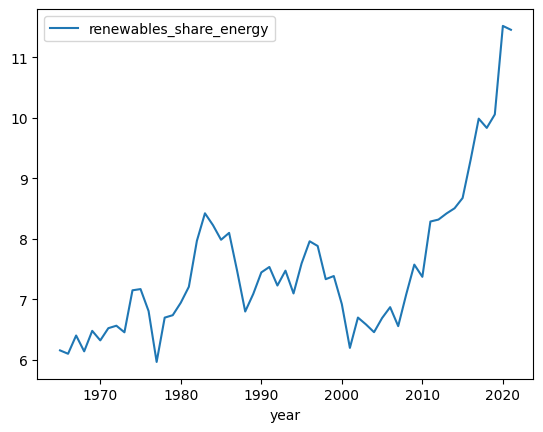

In [754]:
na_renew = continent_data[continent_data['country'] == 'North America'][['year', 'renewables_share_energy']].dropna().reset_index().drop(columns='index')
na_renew.plot(x = 'year', y = 'renewables_share_energy')

c:\Users\bklec\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



p-value: 0.6868282415550734


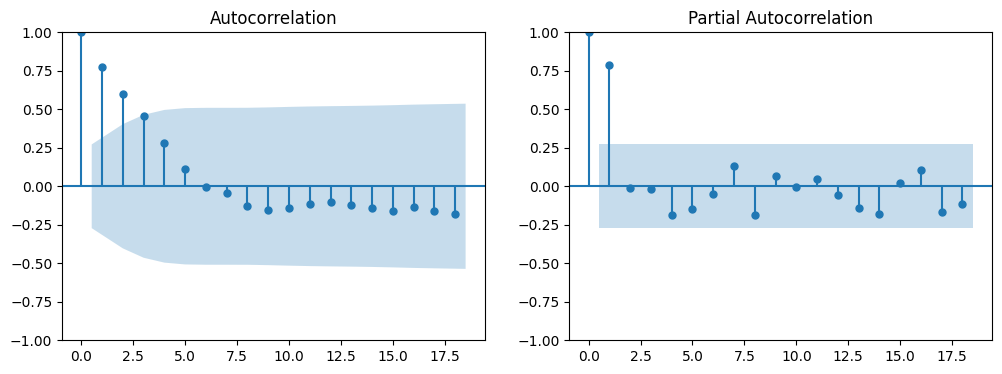

In [760]:
na_renew_train = na_renew[na_renew['year'] < 2017].copy()
na_renew_test = na_renew[~(na_renew['year'] < 2017)].copy()

fig, ax = plt.subplots(1,2, figsize=(12,4))
acf_original = plot_acf(na_renew_train['renewables_share_energy'], ax=ax[0])
pacf_original = plot_pacf(na_renew_train['renewables_share_energy'], ax=ax[1])

adf_test = adfuller(na_renew_train['renewables_share_energy'])
print(f'p-value: {adf_test[1]}')

c:\Users\bklec\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



p-value: 4.663124718830984e-10


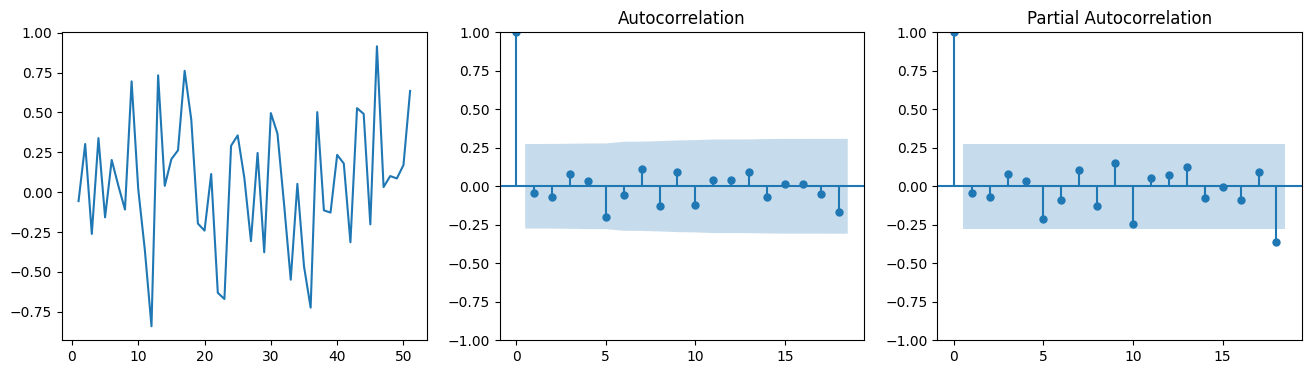

In [761]:
fig, ax = plt.subplots(1,3, figsize=(16,4))

# adf test insufficient to reject null hypothesis - do first order differencing and plot the data, ACF and PACF
na_renew_train_diff = na_renew_train['renewables_share_energy'].diff().dropna()
na_renew_train_diff.plot(ax=ax[0])

acf_diff = plot_acf(na_renew_train_diff, ax=ax[1])
pacf_diff = plot_pacf(na_renew_train_diff, ax=ax[2])

adf_test_diff = adfuller(na_renew_train_diff)
print(f'p-value: {adf_test_diff[1]}')

In [762]:
# fit the arima model based on parameters above and look at AIC/BIC - this combination of (p, d, q) gives the lowest AIC/BIC score
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(na_renew_train['renewables_share_energy'], order=(2,2,0))
model_fit = model.fit()
print(model_fit.summary())

                                  SARIMAX Results                                  
Dep. Variable:     renewables_share_energy   No. Observations:                   52
Model:                      ARIMA(2, 2, 0)   Log Likelihood                 -32.150
Date:                     Thu, 30 Mar 2023   AIC                             70.300
Time:                             19:42:36   BIC                             76.036
Sample:                                  0   HQIC                            72.484
                                      - 52                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6806      0.128     -5.330      0.000      -0.931      -0.430
ar.L2         -0.4141      0.134     -3.082      0.002      -0.677      -0.151
sigma2      

<Axes: >

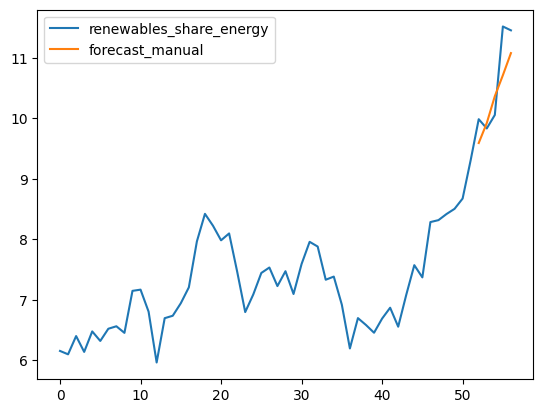

In [763]:
# look at the manually determined data
forecast_test = model_fit.forecast(len(na_renew_test['renewables_share_energy']))
na_renew['forecast_manual'] = [None]*len(na_renew_train) + list(forecast_test)

na_renew[['renewables_share_energy', 'forecast_manual']].plot()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   52
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -25.577
Date:                Thu, 30 Mar 2023   AIC                             55.155
Time:                        19:42:39   BIC                             59.018
Sample:                             0   HQIC                            56.631
                                 - 52                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0619      0.056      1.099      0.272      -0.049       0.172
sigma2         0.1596      0.036      4.481      0.000       0.090       0.229
Ljung-Box (L1) (Q):                   0.09   Jarque-

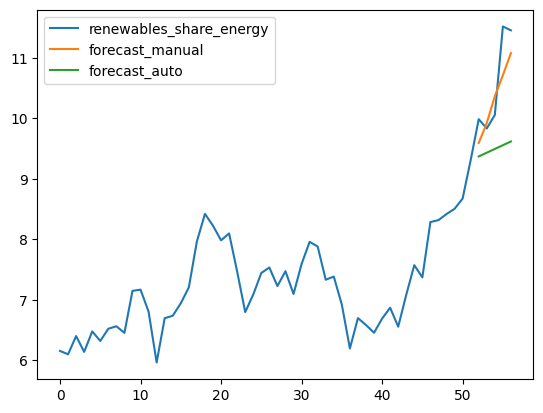

In [764]:
# compare auto and manually forecasted models
auto_arima = pm.auto_arima(na_renew_train['renewables_share_energy'], stepwise=False, seasonal=False)
print(auto_arima.summary())

forecast_test_auto = auto_arima.predict(n_periods=len(na_renew_test))
na_renew['forecast_auto'] = [None]*len(na_renew_train) + list(forecast_test_auto)

na_renew[['renewables_share_energy', 'forecast_manual', 'forecast_auto']].plot()

mae = mean_absolute_error(na_renew_test['renewables_share_energy'], forecast_test)
mape = mean_absolute_percentage_error(na_renew_test['renewables_share_energy'], forecast_test)
rmse = np.sqrt(mean_squared_error(na_renew_test['renewables_share_energy'], forecast_test))

print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')

### Hence, for NA's renewables_share_energy, we use an ARIMA model of (2,2,0) for forecasting (manually determined)

Similar to Africa, we want to capture the rapid increase in renewable energy usage in North America